In [1]:
#import csv
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

file= "dm_export_19900101_20201231.csv"

df=pd.read_csv(file,parse_dates=["MapDate"])
df["Year"]=df["MapDate"].dt.strftime('%Y')
df

,State,County,FIPS,MapDate,DSCI,Year
0,AZ,Apache County,4001,2000-01-04,43,2000
1,AZ,Apache County,4001,2000-01-11,100,2000
2,AZ,Apache County,4001,2000-01-18,100,2000
3,AZ,Apache County,4001,2000-01-25,100,2000
4,AZ,Apache County,4001,2000-02-01,100,2000
...,...,...,...,...,...,...
73427,WY,Uinta County,56041,2020-12-01,235,2020
73428,WY,Uinta County,56041,2020-12-08,235,2020
73429,WY,Uinta County,56041,2020-12-15,236,2020
73430,WY,Uinta County,56041,2020-12-22,236,2020


In [2]:
df_nv=df.loc[df.State=="NV"]
df_nv=df_nv.drop(columns=["FIPS"])
df_nv

,State,County,MapDate,DSCI,Year
50416,NV,Clark County,2000-01-04,0,2000
50417,NV,Clark County,2000-01-11,100,2000
50418,NV,Clark County,2000-01-18,100,2000
50419,NV,Clark County,2000-01-25,100,2000
50420,NV,Clark County,2000-02-01,100,2000
...,...,...,...,...,...
54795,NV,White Pine County,2020-12-01,456,2020
54796,NV,White Pine County,2020-12-08,456,2020
54797,NV,White Pine County,2020-12-15,456,2020
54798,NV,White Pine County,2020-12-22,456,2020


In [3]:
df_nv_groups=df_nv.groupby(["State","Year"]).mean()

In [4]:
df_nv_groups.reset_index()

,State,Year,DSCI
0,NV,2000,34.259615
1,NV,2001,64.538462
2,NV,2002,259.820755
3,NV,2003,359.225962
4,NV,2004,318.788462
5,NV,2005,34.769231
6,NV,2006,19.865385
7,NV,2007,230.028846
8,NV,2008,221.721698
9,NV,2009,143.514423


In [5]:
df_nv_groups=df_nv_groups.groupby(["State","Year"]).mean().reset_index()
df_nv_groups

,State,Year,DSCI
0,NV,2000,34.259615
1,NV,2001,64.538462
2,NV,2002,259.820755
3,NV,2003,359.225962
4,NV,2004,318.788462
5,NV,2005,34.769231
6,NV,2006,19.865385
7,NV,2007,230.028846
8,NV,2008,221.721698
9,NV,2009,143.514423


<AxesSubplot:xlabel='Year'>

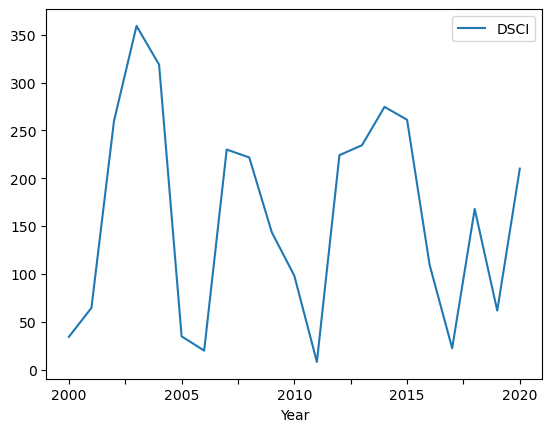

In [6]:
df_nv_groups.plot(x="Year")

In [7]:
df_nv_county_groups=df_nv.groupby(["County","Year"]).mean().reset_index()
df_nv_county_groups

,County,Year,DSCI
0,Clark County,2000,31.865385
1,Clark County,2001,10.365385
2,Clark County,2002,313.301887
3,Clark County,2003,326.442308
4,Clark County,2004,296.000000
...,...,...,...
79,White Pine County,2016,49.173077
80,White Pine County,2017,14.634615
81,White Pine County,2018,171.461538
82,White Pine County,2019,64.811321


In [8]:
county_list=df_nv["County"].unique()
county_list

array(['Clark County', 'Lincoln County', 'Nye County',
       'White Pine County'], dtype=object)

Clark County
Lincoln County
Nye County
White Pine County


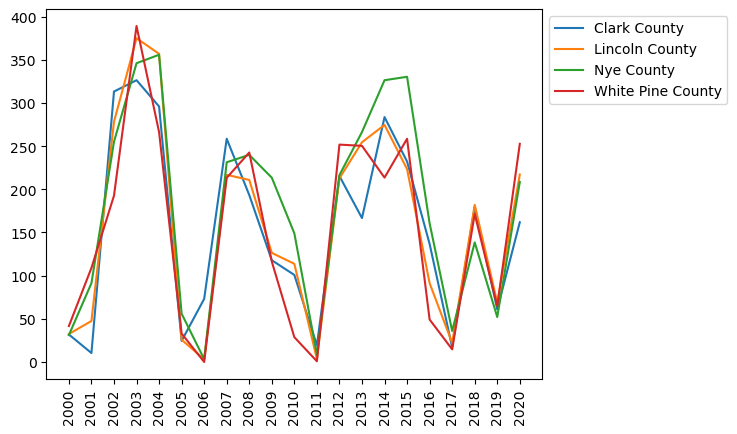

In [9]:
for county in county_list:
    print(county)
    df_nv_map=df_nv_county_groups.loc[df_nv_county_groups["County"]==county]
    df_nv_map=df_nv_map.drop(columns=["County"])
    df_nv_map=df_nv_map.rename(columns={"DSCI": county + " DSCI "})
    x2=df_nv_map["Year"].to_list()
    y2=df_nv_map[county + " DSCI "].to_list()
    plt.plot(x2,y2,label=county)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()